In [1]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Data exploration

In [3]:
df_train.head()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df_test.head()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,198366,132459,2.079192,0.052662,-1.755167,0.418802,0.310472,-0.886053,0.083326,-0.149153,...,-0.250318,-0.385564,-1.074903,0.351592,0.441535,-0.300612,0.179993,-0.072265,-0.034296,0.99
1,198367,132460,1.596563,-1.588177,-1.186718,-1.710578,-0.378661,0.906028,-0.796517,0.443712,...,0.016012,0.395564,0.993546,-0.024412,-1.613532,-0.392005,-0.055686,0.033064,-0.042575,183.02
2,198368,132460,2.273454,-1.447207,-0.946779,-1.738063,-1.074172,-0.139592,-1.266807,-0.047025,...,-0.384806,-0.142609,0.098889,0.150236,-0.813565,-0.193346,-0.148293,0.020379,-0.063042,21.00
3,198369,132460,1.987406,0.140840,-2.001286,1.071763,0.717042,-0.880590,0.670095,-0.288313,...,-0.274861,0.158934,0.427937,-0.082711,-0.493515,0.434758,-0.473680,-0.045832,-0.075119,35.00
4,198370,132461,-0.398751,1.370313,-0.715049,-0.867699,1.157188,-0.364107,1.151124,-0.316554,...,0.475877,0.182382,1.126963,-0.183504,0.047153,-0.570891,-0.222038,0.657472,0.278362,0.89


In [5]:
print(len(df_train))
print(len(df_test))

198365
86442


In [6]:
df_train.describe()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,...,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000
mean,99183.000000,70130.934414,-0.107339,0.004431,0.325762,0.077514,-0.113668,0.046607,-0.051740,0.017719,...,-0.014966,-0.049185,-0.015766,0.004333,0.061965,0.006424,0.001587,0.001976,89.703525,0.001931
std,57263.187411,34305.103318,1.891453,1.622666,1.446295,1.398805,1.360659,1.310315,1.216025,1.210508,...,0.738678,0.690646,0.610795,0.603471,0.490441,0.488446,0.394026,0.314154,248.680051,0.043898
min,1.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,49592.000000,44128.000000,-0.962685,-0.580147,-0.327270,-0.790975,-0.785452,-0.709602,-0.576733,-0.180360,...,-0.227188,-0.538206,-0.168622,-0.341607,-0.238794,-0.331187,-0.067367,-0.041312,5.990000,0.000000
50%,99183.000000,67005.000000,-0.094105,0.082136,0.496715,0.078139,-0.171469,-0.218506,-0.010989,0.043647,...,-0.043309,-0.035961,-0.029126,0.052775,0.104492,-0.061019,0.006036,0.018528,22.990000,0.000000
75%,148774.000000,90198.000000,1.213058,0.783763,1.225320,0.889229,0.462401,0.444661,0.499504,0.339098,...,0.150027,0.421133,0.114667,0.421534,0.384995,0.261761,0.089128,0.078235,79.200000,0.000000
max,198365.000000,132458.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [7]:
df_test.describe()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,86442.000000,86442.000000,86442.000000,86442.000000,86442.000000,86442.000000,86442.000000,86442.000000,86442.000000,86442.000000,...,86442.000000,86442.000000,86442.000000,86442.000000,86442.000000,86442.000000,86442.000000,86442.000000,86442.000000,86442.000000
mean,241586.500000,151455.636138,0.246319,-0.010168,-0.747551,-0.177878,0.260842,-0.106953,0.118732,-0.040660,...,-0.046113,0.034345,0.112869,0.036180,-0.009944,-0.142195,-0.014741,-0.003641,-0.004535,85.242710
std,24953.800322,11097.613883,2.084114,1.715195,1.404391,1.438574,1.389467,1.375386,1.276237,1.155408,...,0.816333,0.723737,0.788858,0.653308,0.610499,0.560621,0.467311,0.424837,0.363973,253.367883
min,198366.000000,132459.000000,-46.855047,-50.383269,-48.325589,-5.560118,-113.743307,-20.869626,-23.386192,-39.688571,...,-54.497720,-21.620120,-7.331078,-36.666000,-2.775670,-8.696627,-1.855355,-9.895244,-15.430084,0.000000
25%,219976.250000,141963.000000,-0.807325,-0.644384,-1.601619,-0.958370,-0.429350,-0.889948,-0.488778,-0.269133,...,-0.245761,-0.231824,-0.552321,-0.138974,-0.380555,-0.451210,-0.303436,-0.075492,-0.062166,5.000000
50%,241586.500000,151086.500000,0.103686,0.023486,-0.736982,-0.338452,0.251842,-0.411461,0.157200,-0.032661,...,-0.106414,0.026057,0.166930,0.043394,0.016956,-0.201567,-0.028307,-0.009441,-0.028452,20.000000
75%,263196.750000,160838.000000,1.980366,0.839139,0.111316,0.421203,0.873768,0.278370,0.745373,0.295482,...,0.086445,0.249461,0.745682,0.230524,0.525286,0.216115,0.214682,0.097407,0.078458,72.570000
max,284807.000000,172792.000000,2.451888,12.730564,3.937048,15.304184,29.162172,73.301626,120.589494,10.713656,...,23.643417,20.063786,8.272233,22.528412,4.584549,6.070850,3.415636,31.612198,15.942151,25691.160000


Analyses for Train Data

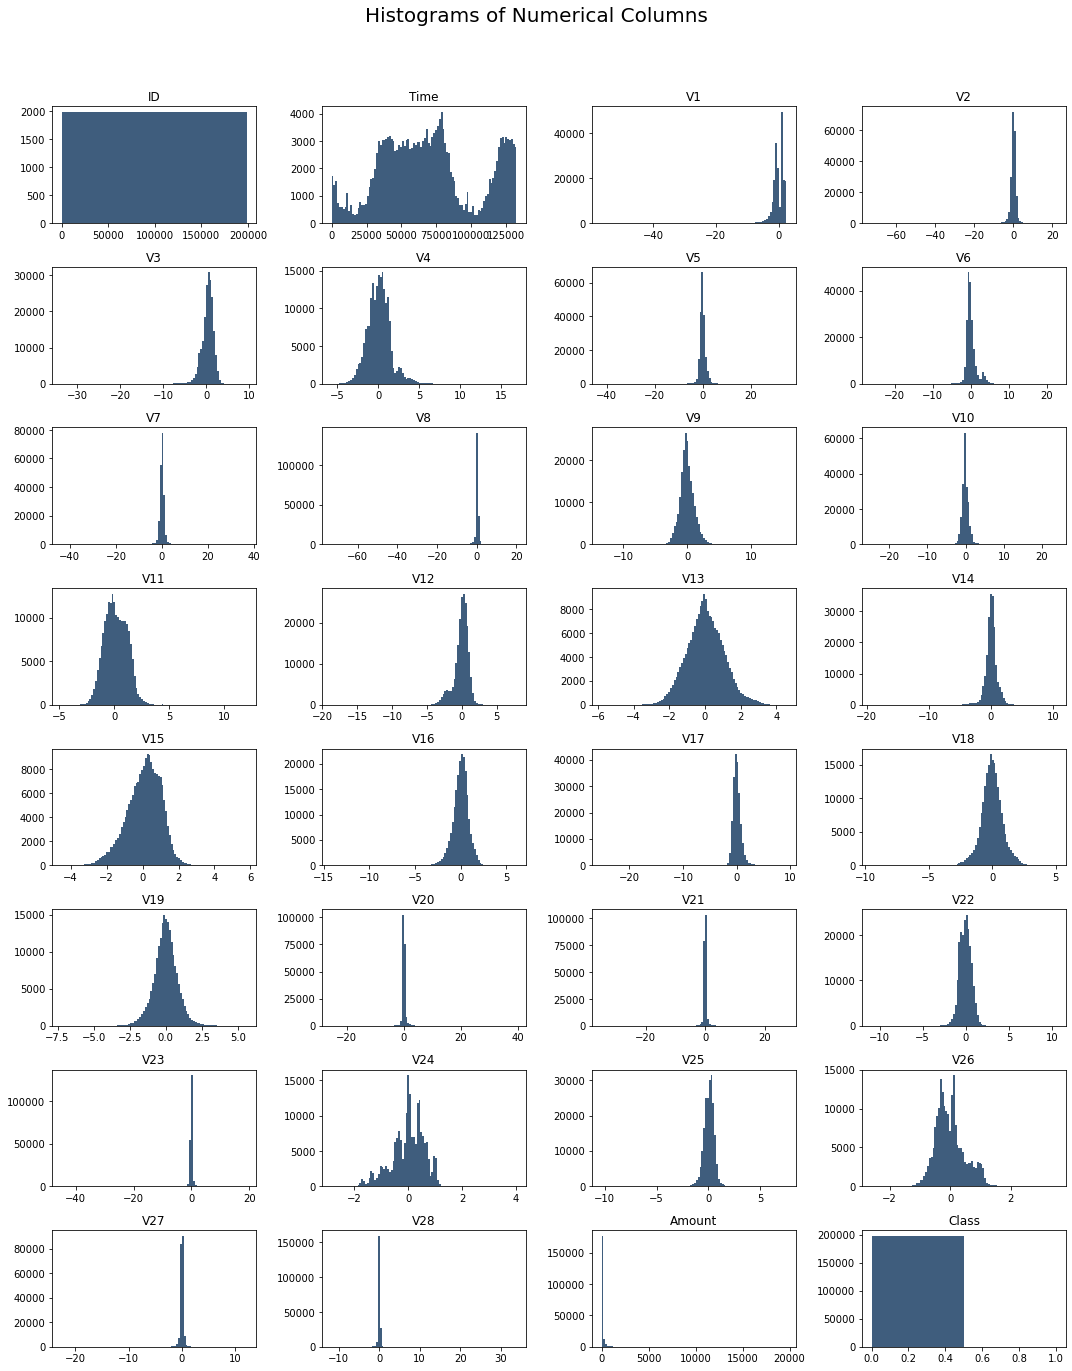

In [8]:
## Histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df_train.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(df_train.columns.values[i])

    vals = np.size(df_train.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum
    
    plt.hist(df_train.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Analysis for test data

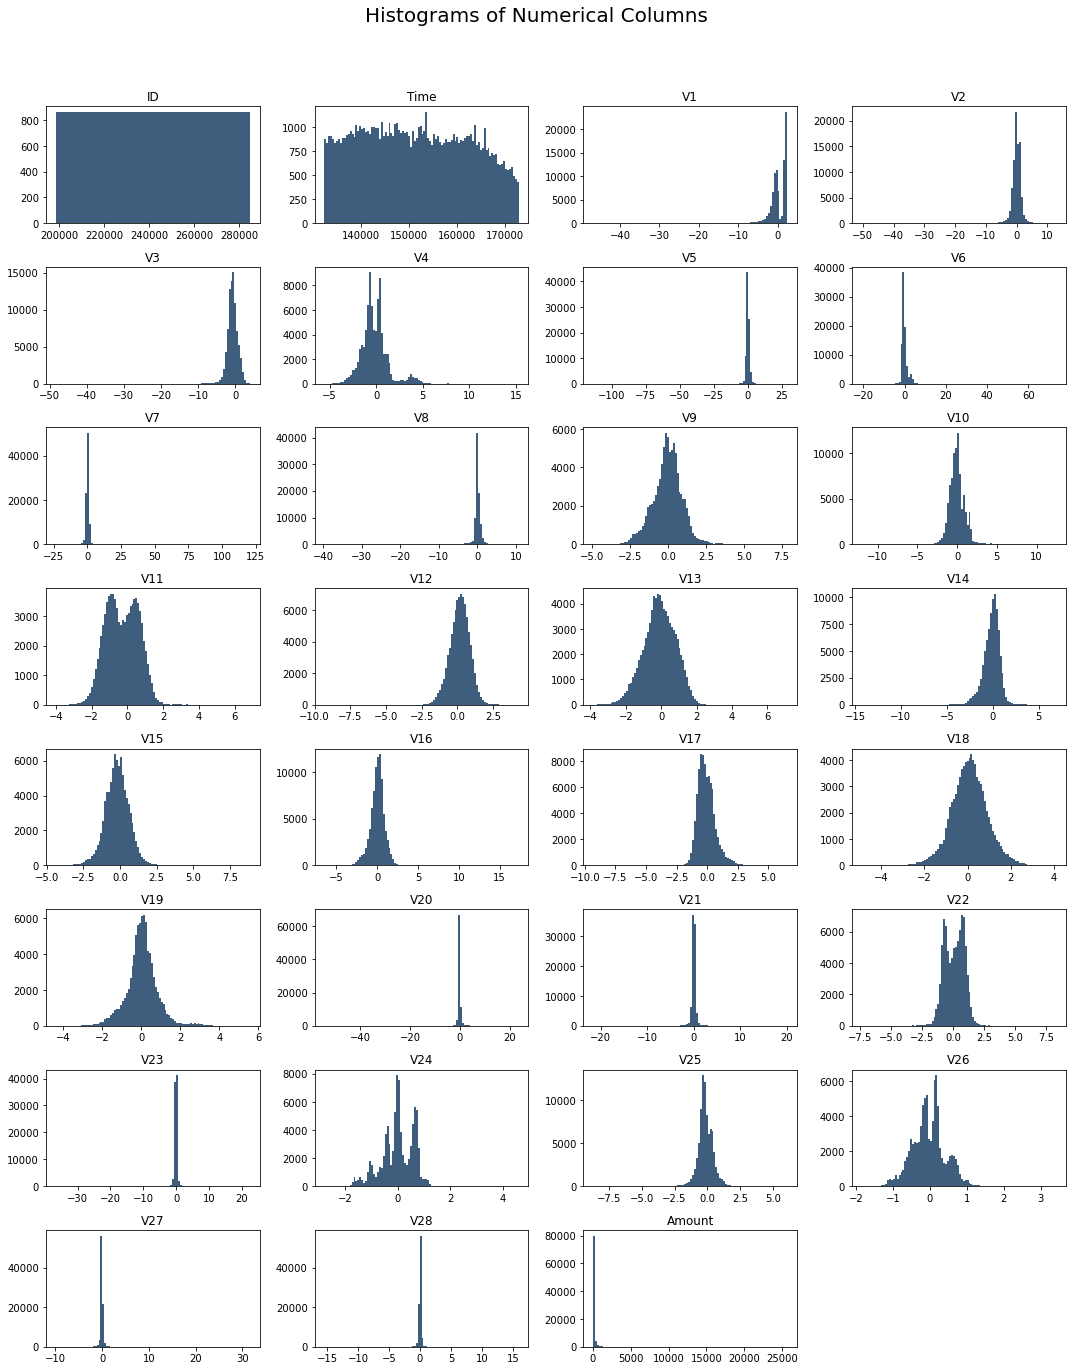

In [9]:
## Histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df_test.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(df_test.columns.values[i])

    vals = np.size(df_test.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum
    
    plt.hist(df_test.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

- we can observe a large prevalence of Class 0 (non fraudulent).

In [10]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in train dataset'
      %(len(df_train[df_train.Class==1]), len(df_train[df_train.Class==1])/len(df_train)*100000))

Number of fraudulent transactions = 383 or 193 per 100,000 transactions in train dataset


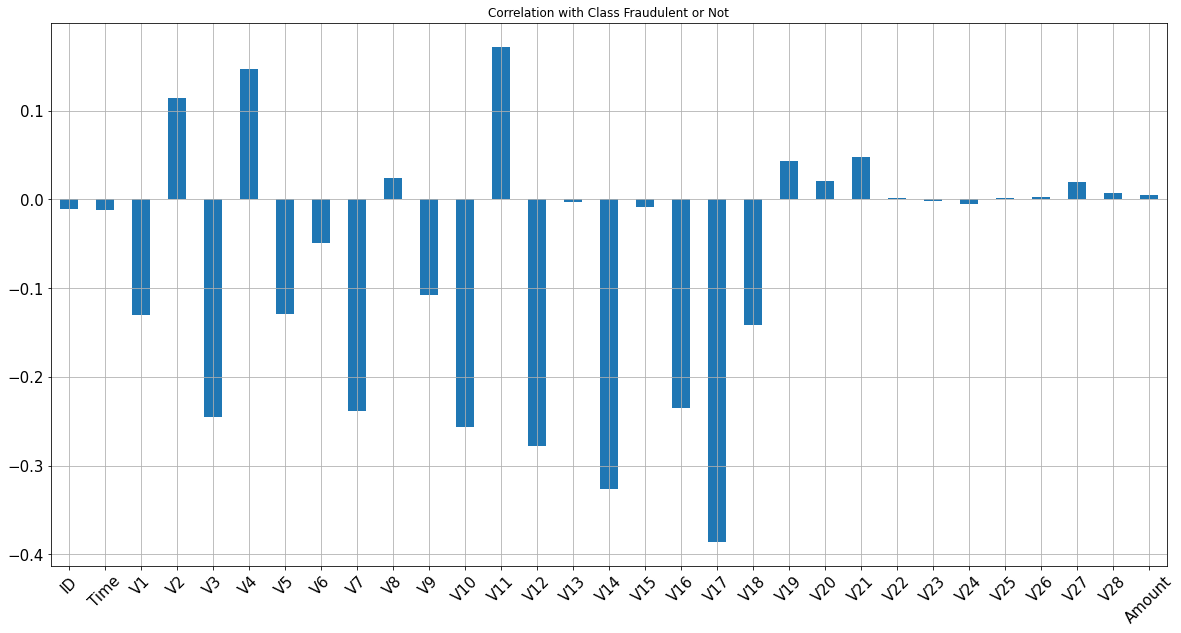

In [11]:
## Linear Correlation with Response Variable in train data
df_train2 = df_train.drop(columns = ['Class'])   # drop non numerical columns
df_train2.corrwith(df_train.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

## Pre-processing

In [12]:
from sklearn.preprocessing import StandardScaler
df_train['normalizedAmount'] = StandardScaler().fit_transform(df_train['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
df_train = df_train.drop(['Amount'],axis=1)
df_test['normalizedAmount'] = StandardScaler().fit_transform(df_test['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
df_test = df_test.drop(['Amount'],axis=1)

In [13]:
df_train.head()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.240939
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.349902
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.161964
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.135904
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.079273


In [14]:
df_test.head()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,198366,132459,2.079192,0.052662,-1.755167,0.418802,0.310472,-0.886053,0.083326,-0.149153,...,-0.250318,-0.385564,-1.074903,0.351592,0.441535,-0.300612,0.179993,-0.072265,-0.034296,-0.332533
1,198367,132460,1.596563,-1.588177,-1.186718,-1.710578,-0.378661,0.906028,-0.796517,0.443712,...,0.016012,0.395564,0.993546,-0.024412,-1.613532,-0.392005,-0.055686,0.033064,-0.042575,0.385913
2,198368,132460,2.273454,-1.447207,-0.946779,-1.738063,-1.074172,-0.139592,-1.266807,-0.047025,...,-0.384806,-0.142609,0.098889,0.150236,-0.813565,-0.193346,-0.148293,0.020379,-0.063042,-0.253557
3,198369,132460,1.987406,0.140840,-2.001286,1.071763,0.717042,-0.880590,0.670095,-0.288313,...,-0.274861,0.158934,0.427937,-0.082711,-0.493515,0.434758,-0.473680,-0.045832,-0.075119,-0.198301
4,198370,132461,-0.398751,1.370313,-0.715049,-0.867699,1.157188,-0.364107,1.151124,-0.316554,...,0.475877,0.182382,1.126963,-0.183504,0.047153,-0.570891,-0.222038,0.657472,0.278362,-0.332928


In [15]:
df_train = df_train.drop(['Time'],axis=1)
df_train = df_train.drop(['ID'],axis=1)
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.240939
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.349902
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.161964
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.135904
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.079273


In [16]:
df_test = df_test.drop(['Time'],axis=1)
df_test = df_test.drop(['ID'],axis=1)
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,2.079192,0.052662,-1.755167,0.418802,0.310472,-0.886053,0.083326,-0.149153,0.721121,-0.334404,...,-0.250318,-0.385564,-1.074903,0.351592,0.441535,-0.300612,0.179993,-0.072265,-0.034296,-0.332533
1,1.596563,-1.588177,-1.186718,-1.710578,-0.378661,0.906028,-0.796517,0.443712,2.149723,-0.903409,...,0.016012,0.395564,0.993546,-0.024412,-1.613532,-0.392005,-0.055686,0.033064,-0.042575,0.385913
2,2.273454,-1.447207,-0.946779,-1.738063,-1.074172,-0.139592,-1.266807,-0.047025,-1.345062,1.713041,...,-0.384806,-0.142609,0.098889,0.150236,-0.813565,-0.193346,-0.148293,0.020379,-0.063042,-0.253557
3,1.987406,0.140840,-2.001286,1.071763,0.717042,-0.880590,0.670095,-0.288313,-0.229202,0.553870,...,-0.274861,0.158934,0.427937,-0.082711,-0.493515,0.434758,-0.473680,-0.045832,-0.075119,-0.198301
4,-0.398751,1.370313,-0.715049,-0.867699,1.157188,-0.364107,1.151124,-0.316554,0.756304,0.843054,...,0.475877,0.182382,1.126963,-0.183504,0.047153,-0.570891,-0.222038,0.657472,0.278362,-0.332928


In [17]:
X = df_train.drop(['Class'],axis=1)
y = df_train['Class']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [19]:
X_train.shape

(138855, 29)

In [20]:
X_test.shape

(59510, 29)

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
random_forest = RandomForestClassifier(n_estimators=100)

In [23]:
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [24]:
y_pred_RF = random_forest.predict(X_test)

In [25]:
random_forest.score(X_test,y_test)

0.9995462947403798

In [26]:
# Approach to plot confusion matrix (from scikit-learn.org site)
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[59389     6]
 [   21    94]]


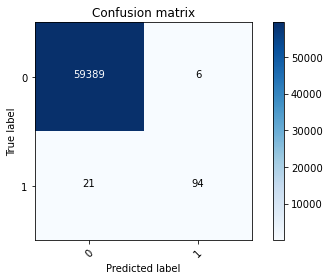

In [27]:
# Confusion matrix on the test dataset
cnf_matrix_RF = confusion_matrix(y_test,y_pred_RF)
plot_confusion_matrix(cnf_matrix_RF,classes=[0,1])

In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
acc_RF = accuracy_score(y_test, y_pred_RF)
prec_RF = precision_score(y_test, y_pred_RF)
rec_RF = recall_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)
print('accuracy:%0.4f'%acc_RF,'\tprecision:%0.4f'%prec_RF,'\trecall:%0.4f'%rec_RF,'\tF1-score:%0.4f'%f1_RF)

accuracy:0.9995 	precision:0.9400 	recall:0.8174 	F1-score:0.8744


Storing each model's performance in a dataframe for comparison purpose

In [29]:
results_testset = pd.DataFrame([['RandomForest', acc_RF, 1-rec_RF, rec_RF, prec_RF, f1_RF]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999546,0.182609,0.817391,0.94,0.874419


C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


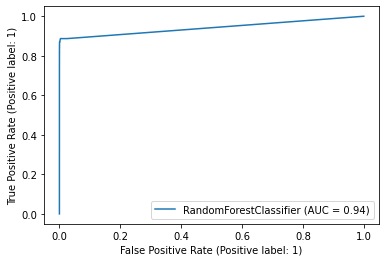

In [30]:
ROC_RF = plot_roc_curve(random_forest, X_test, y_test)
plt.show()

Running the models on the full dataset to check

Confusion matrix, without normalization
[[197976      6]
 [    21    362]]


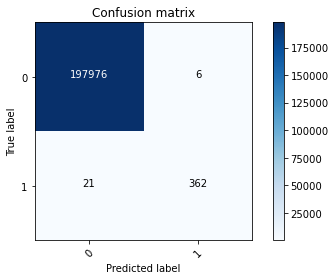

In [31]:
# Confusion matrix on the whole dataset
y_pred_RF_wl = random_forest.predict(X)
cnf_matrix_RF_wl = confusion_matrix(y,y_pred_RF_wl.round())
plot_confusion_matrix(cnf_matrix_RF_wl,classes=[0,1])

In [32]:
acc_RF_wl = accuracy_score(y, y_pred_RF_wl)
prec_RF_wl = precision_score(y, y_pred_RF_wl)
rec_RF_wl = recall_score(y, y_pred_RF_wl)
f1_RF_wl = f1_score(y, y_pred_RF_wl)
print('accuracy:%0.4f'%acc_RF_wl,'\tprecision:%0.4f'%prec_RF_wl,'\trecall:%0.4f'%rec_RF_wl,'\tF1-score:%0.4f'%f1_RF_wl)

accuracy:0.9999 	precision:0.9837 	recall:0.9452 	F1-score:0.9640


In [33]:
results_fullset = pd.DataFrame([['RandomForest', acc_RF_wl, 1-rec_RF_wl, rec_RF_wl, prec_RF_wl, f1_RF_wl]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999864,0.05483,0.94517,0.983696,0.964048


## Decision trees

In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [35]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [36]:
y_pred_dt = decision_tree.predict(X_test)

In [37]:
decision_tree.score(X_test,y_test)

0.9990589816837506

Confusion matrix, without normalization
[[59368    27]
 [   29    86]]


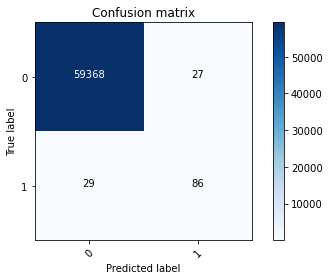

In [38]:
# Confusion matrix on the test dataset
cnf_matrix_dt = confusion_matrix(y_test,y_pred_dt)
plot_confusion_matrix(cnf_matrix_dt,classes=[0,1])

In [39]:
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [40]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['DecisionTree', acc_dt, 1-rec_dt, rec_dt, prec_dt, f1_dt]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999546,0.182609,0.817391,0.940000,0.874419
1,DecisionTree,0.999059,0.252174,0.747826,0.761062,0.754386


C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


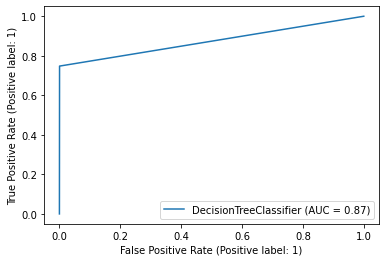

In [41]:
ROC_DT = plot_roc_curve(decision_tree, X_test, y_test)
plt.show()

Confusion matrix, without normalization
[[197955     27]
 [    29    354]]


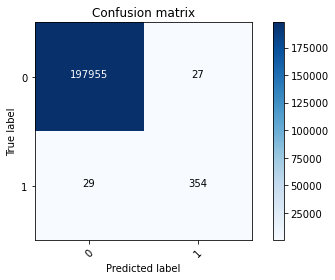

In [42]:
# Confusion matrix on the whole dataset
y_pred_dt_wl = decision_tree.predict(X)
cnf_matrix_dt_wl = confusion_matrix(y,y_pred_dt_wl.round())
plot_confusion_matrix(cnf_matrix_dt_wl,classes=[0,1])

In [43]:
acc_dt_wl = accuracy_score(y, y_pred_dt_wl)
prec_dt_wl = precision_score(y, y_pred_dt_wl)
rec_dt_wl = recall_score(y, y_pred_dt_wl)
f1_dt_wl = f1_score(y, y_pred_dt_wl)

In [44]:
model_results = pd.DataFrame([['DecisionTree', acc_dt_wl, 1-rec_dt_wl, rec_dt_wl, prec_dt_wl, f1_dt_wl]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999864,0.054830,0.945170,0.983696,0.964048
1,DecisionTree,0.999718,0.075718,0.924282,0.929134,0.926702


# XGB

In [45]:
from xgboost import XGBClassifier

In [46]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [47]:
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_test,y_test)

0.9994118635523441

Confusion matrix, without normalization
[[59388     7]
 [   28    87]]


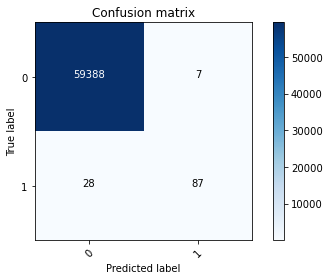

In [48]:
# Confusion matrix on the test dataset
cnf_matrix_xgb = confusion_matrix(y_test,y_pred_xgb)
plot_confusion_matrix(cnf_matrix_xgb,classes=[0,1])

In [49]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

In [50]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['XGB', acc_xgb, 1-rec_xgb, rec_xgb, prec_xgb, f1_xgb]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999546,0.182609,0.817391,0.940000,0.874419
1,DecisionTree,0.999059,0.252174,0.747826,0.761062,0.754386
2,XGB,0.999412,0.243478,0.756522,0.925532,0.832536


Confusion matrix, without normalization
[[197975      7]
 [    28    355]]


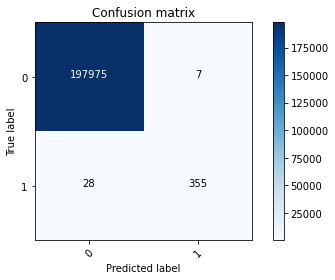

In [51]:
# Confusion matrix on the whole dataset
y_pred_xgb_wl = xgb.predict(X)
cnf_matrix_xgb_wl = confusion_matrix(y,y_pred_xgb_wl.round())
plot_confusion_matrix(cnf_matrix_xgb_wl,classes=[0,1])

In [52]:
acc_xgb_wl = accuracy_score(y, y_pred_xgb_wl)
prec_xgb_wl = precision_score(y, y_pred_xgb_wl)
rec_xgb_wl = recall_score(y, y_pred_xgb_wl)
f1_xgb_wl = f1_score(y, y_pred_xgb_wl)

model_results = pd.DataFrame([['XGB', acc_xgb_wl, 1-rec_xgb_wl, rec_xgb_wl, prec_xgb_wl, f1_xgb_wl]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999864,0.054830,0.945170,0.983696,0.964048
1,DecisionTree,0.999718,0.075718,0.924282,0.929134,0.926702
2,XGB,0.999824,0.073107,0.926893,0.980663,0.953020


# Neural Network models

In [53]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep neural network
- We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 29 as input. This represents the information related to each transactions, ie each line with 29 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not fraudulent (0) or fraudulent (1).
- a dropout step is included to prevent overfitting.

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [55]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,113
Trainable params: 2,113
Non-trainabl

## Training

In [57]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
9257/9257 [==============================] - 11s 1ms/step - loss: 0.0097 - accuracy: 0.9988
Epoch 2/5
9257/9257 [==============================] - 10s 1ms/step - loss: 0.0042 - accuracy: 0.9992
Epoch 3/5
9257/9257 [==============================] - 10s 1ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 4/5
9257/9257 [==============================] - 10s 1ms/step - loss: 0.0036 - accuracy: 0.9992
Epoch 5/5
9257/9257 [==============================] - 10s 1ms/step - loss: 0.0034 - accuracy: 0.9993


In [58]:
score = model.evaluate(X_test, y_test)

1860/1860 [==============================] - 2s 812us/step - loss: 0.0034 - accuracy: 0.9991


In [59]:
print(score)

[0.003356293076649308, 0.9990925788879395]


- The model achieves an accuracy of 99.94% ! Is this a good performance ?
- Remember that our dataset is significantly composed of non fraudulent samples with only 172 fraudulent transactions per 100,000. Consequently, a model predicting every transaction as 'non fraudulent' would achieve 99.83% accuracy despite being unable to detect a single fraudulent case !

Test Data Accuracy: 0.9991


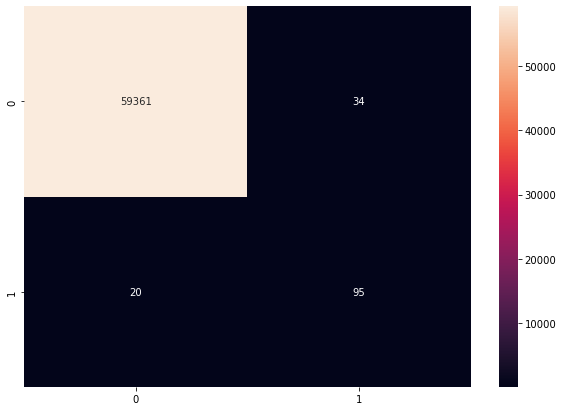

In [60]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred_DNN= model.predict(X_test)
for i in range(len(y_test)):
    if y_pred_DNN[i]>0.5:
        y_pred_DNN[i]=1 
    else:
        y_pred_DNN[i]=0
cm_DNN = confusion_matrix(y_test, y_pred_DNN) # rows = truth, cols = prediction
df_cm_DNN = pd.DataFrame(cm_DNN, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm_DNN, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred_DNN))

Detection of fraudulent transactions did not improve compared to the previous machine learning models.
- 115 fraudulent transactions are detected as fraudulent by the model, yet 32 fraudulent transactions are not identified (false negative) which remains an issue. Our objective must be to detect as many fraudulent transactions as possible since these can have a huge negative impact.
- 21 regular transactions are detected as potentially fraudulent by the model. These are false positive. This number is negligible.

Conclusion : We must find ways to further reduce the number of false negative.

In [61]:
acc_DNN = accuracy_score(y_test, y_pred_DNN.round())
prec_DNN = precision_score(y_test, y_pred_DNN.round())
rec_DNN = recall_score(y_test, y_pred_DNN.round())
f1_DNN = f1_score(y_test, y_pred_DNN.round())

In [62]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['Deep NeuralNetwork', acc_DNN, 1-rec_DNN, rec_DNN, prec_DNN, f1_DNN]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999546,0.182609,0.817391,0.940000,0.874419
1,DecisionTree,0.999059,0.252174,0.747826,0.761062,0.754386
2,XGB,0.999412,0.243478,0.756522,0.925532,0.832536
3,Deep NeuralNetwork,0.999093,0.173913,0.826087,0.736434,0.778689


Confusion matrix, without normalization
[[197900     82]
 [    54    329]]


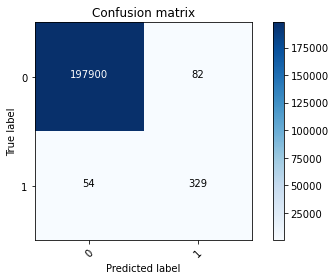

In [63]:
# Confusion matrix on the whole dataset
y_pred_DNN_wl = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred_DNN_wl.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [64]:
acc_DNN_wl = accuracy_score(y, y_pred_DNN_wl.round())
prec_DNN_wl = precision_score(y, y_pred_DNN_wl.round())
rec_DNN_wl = recall_score(y, y_pred_DNN_wl.round())
f1_DNN_wl = f1_score(y, y_pred_DNN_wl.round())

In [65]:
model_results = pd.DataFrame([['Deep NeuralNetwork', acc_DNN_wl, 1-rec_DNN_wl, rec_DNN_wl, prec_DNN_wl, f1_DNN_wl]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999864,0.054830,0.945170,0.983696,0.964048
1,DecisionTree,0.999718,0.075718,0.924282,0.929134,0.926702
2,XGB,0.999824,0.073107,0.926893,0.980663,0.953020
3,Deep NeuralNetwork,0.999314,0.140992,0.859008,0.800487,0.828715


## Undersampling
- In order to balance the train set, another technique is undersampling. With this technique, we adjust the largest class to match the number of samples of the under-represented class. Here we want to randomly pick an amount of non-fraudulent transactions equal to the number of fraudulent transactions in the dataset.

In [66]:
fraud_indices = np.array(df_train[df_train.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

383


In [67]:
normal_indices = df_train[df_train.Class == 0].index

In [68]:
len(normal_indices)

197982

In [69]:
# Random select N indices from non fraudulent samples (N equals to number of fraudulent records)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

383


In [70]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

766


In [71]:
under_sample_data = df_train.iloc[under_sample_indices,:]

In [72]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [73]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [74]:
X_train_us = np.array(X_train_us)
X_test_us = np.array(X_test_us)
y_train_us = np.array(y_train_us)
y_test_us = np.array(y_test_us)

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,113
Trainable params: 2,113
Non-trainabl

In [76]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_us,y_train_us,batch_size=15,epochs=5)

Epoch 1/5
36/36 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.9403
Epoch 2/5
36/36 [==============================] - 0s 1ms/step - loss: 0.2000 - accuracy: 0.9403
Epoch 3/5
36/36 [==============================] - 0s 1ms/step - loss: 0.1503 - accuracy: 0.9552
Epoch 4/5
36/36 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 0.9571
Epoch 5/5
36/36 [==============================] - 0s 1ms/step - loss: 0.1133 - accuracy: 0.9590


Confusion matrix, without normalization
[[104   1]
 [ 12 113]]


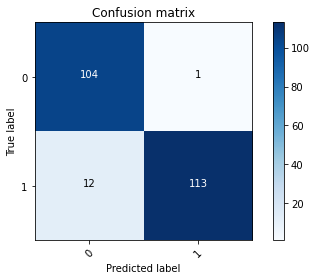

In [77]:
y_pred_us = model.predict(X_test_us)
y_expected_us = pd.DataFrame(y_test_us)
cnf_matrix_us = confusion_matrix(y_expected_us, y_pred_us.round())
plot_confusion_matrix(cnf_matrix_us, classes=[0,1])
plt.show()

- The metrics look pretty strong on the test set....

In [78]:
acc_us = accuracy_score(y_test_us, y_pred_us.round())
prec_us = precision_score(y_test_us, y_pred_us.round())
rec_us = recall_score(y_test_us, y_pred_us.round())
f1_us = f1_score(y_test_us, y_pred_us.round())

In [79]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['Under Sampled NeuralNetwork', acc_us, 1-rec_us, rec_us, prec_us, f1_us]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999546,0.182609,0.817391,0.940000,0.874419
1,DecisionTree,0.999059,0.252174,0.747826,0.761062,0.754386
2,XGB,0.999412,0.243478,0.756522,0.925532,0.832536
3,Deep NeuralNetwork,0.999093,0.173913,0.826087,0.736434,0.778689
4,Under Sampled NeuralNetwork,0.943478,0.096000,0.904000,0.991228,0.945607


Confusion matrix, without normalization
[[196860   1122]
 [    29    354]]


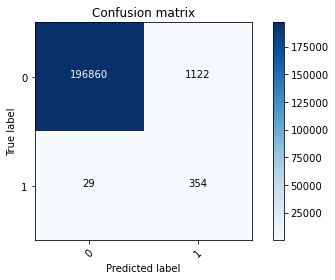

In [80]:
# Confusion matrix on the whole dataset
y_pred_us_wl = model.predict(X)
y_expected_us_wl = pd.DataFrame(y)
cnf_matrix_us_wl = confusion_matrix(y_expected_us_wl, y_pred_us_wl.round())
plot_confusion_matrix(cnf_matrix_us_wl, classes=[0,1])
plt.show()

In [81]:
acc_us_wl = accuracy_score(y, y_pred_us_wl.round())
prec_us_wl = precision_score(y, y_pred_us_wl.round())
rec_us_wl = recall_score(y, y_pred_us_wl.round())
f1_us_wl = f1_score(y, y_pred_us_wl.round())

In [82]:
model_results = pd.DataFrame([['Under Sampled NeuralNetwork', acc_us_wl, 1-rec_us_wl, rec_us_wl, prec_us_wl, f1_us_wl]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999864,0.054830,0.945170,0.983696,0.964048
1,DecisionTree,0.999718,0.075718,0.924282,0.929134,0.926702
2,XGB,0.999824,0.073107,0.926893,0.980663,0.953020
3,Deep NeuralNetwork,0.999314,0.140992,0.859008,0.800487,0.828715
4,Under Sampled NeuralNetwork,0.994198,0.075718,0.924282,0.239837,0.380850


## Oversampling technique using SMOTE
(Synthetic Minority Oversample TEchnique)
- the alternative to down-sampling is the upsampling of the minority class to the same level as the dominant one.
- This can be achieved with the SMOTE method where a new vector is generated between 2 existing datapoints. Applying this technique allows to massively increase the number of fraudulent transactions

In [83]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [84]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [85]:
y_resample

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [89]:
print('Number of total transactions before SMOTE upsampling: ', len(y), '...after SMOTE upsampling: ', len(y_resample))
#print('Number of fraudulent transactions before SMOTE upsampling: ', len(y[y.class==1]), 
      #'...after SMOTE upsampling: ', np.sum(y_resample[y_resample==1]))

Number of total transactions before SMOTE upsampling:  198365 ...after SMOTE upsampling:  395964


In [90]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [92]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [93]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [94]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
18479/18479 [==============================] - 23s 1ms/step - loss: 0.0469 - accuracy: 0.9835
Epoch 2/5
18479/18479 [==============================] - 22s 1ms/step - loss: 0.0150 - accuracy: 0.9960
Epoch 3/5
18479/18479 [==============================] - 23s 1ms/step - loss: 0.0114 - accuracy: 0.9971
Epoch 4/5
18479/18479 [==============================] - 22s 1ms/step - loss: 0.0093 - accuracy: 0.9977
Epoch 5/5
18479/18479 [==============================] - 22s 1ms/step - loss: 0.0080 - accuracy: 0.9982


Confusion matrix, without normalization
[[59115   125]
 [   32 59518]]


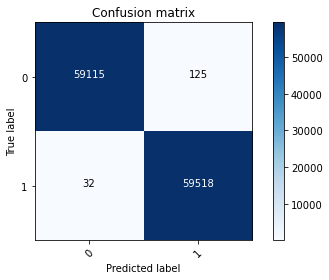

In [95]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- Notice the absence of False Negatives. The model is able to detect all fraudulent transactions on the unseen test set.

In [96]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [97]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999546,0.182609,0.817391,0.940000,0.874419
1,DecisionTree,0.999059,0.252174,0.747826,0.761062,0.754386
2,XGB,0.999412,0.243478,0.756522,0.925532,0.832536
3,Deep NeuralNetwork,0.999093,0.173913,0.826087,0.736434,0.778689
4,Under Sampled NeuralNetwork,0.943478,0.096000,0.904000,0.991228,0.945607
5,OverSampledNeuralNetwork,0.998678,0.000537,0.999463,0.997904,0.998683


All metrics are excellent for this last model.

Confusion matrix, without normalization
[[197613    369]
 [     1    382]]


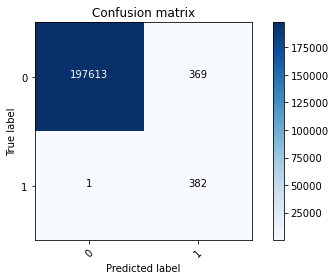

In [98]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- Notice the absence of False Negatives. The model is able to detect all fraudulent transactions on the full dataset.
- Notice the limited number of False Positives which means a lot less verification work (on legitimate transactions) for the fraud departement

In [99]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [100]:
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999864,0.054830,0.945170,0.983696,0.964048
1,DecisionTree,0.999718,0.075718,0.924282,0.929134,0.926702
2,XGB,0.999824,0.073107,0.926893,0.980663,0.953020
3,Deep NeuralNetwork,0.999314,0.140992,0.859008,0.800487,0.828715
4,Under Sampled NeuralNetwork,0.994198,0.075718,0.924282,0.239837,0.380850
5,OverSampledNeuralNetwork,0.998135,0.002611,0.997389,0.508655,0.673721
